In [4944]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from pandas.api.types import CategoricalDtype

In [4945]:
def plot_histogram(data,n):
    %matplotlib inline     
    # allows to output plots in the notebook
    plt.style.use("ggplot")     # Set the default style
    plt.rcParams['figure.dpi'] = 250
    if (data.dtype !=  object) or (data.dtype !=  category):
        plt.hist(data,  width = 0.5, 
                 weights = np.ones(len(data)) / len(data),
                 bins=(np.arange(n+1)-0.2)+min(data) )
    else:
        plt.hist(data,  width = 0.5, 
                 weights = np.ones(len(data)) / len(data),
                 bins=(np.arange(n+1)-0.2) )    
    
    plt.xticks(rotation=90,fontsize=8)
    plt.show()

In [4946]:
cleaned_data = pd.read_excel(r'cleaned_data.xlsx')
cleaned_data.isnull().sum()
combine = [cleaned_data]

In [4947]:
for dataset in combine:
    
    dataset['date'] = cleaned_data['contract_start']
    dataset['year'] = dataset.date.dt.year
    dataset['month'] = dataset.date.dt.month
    dataset['day'] = dataset.date.dt.day
    dataset['dayofyear'] = dataset.date.dt.dayofyear
    dataset['dayofweek'] = dataset.date.dt.dayofweek
    dataset['weekofyear'] = dataset.date.dt.weekofyear
    dataset['weekofmonth'] = dataset['weekofyear']
    dataset['weekofmonth'] = (dataset.date.dt.day/7) +1
    dataset['weekofmonth'] = dataset['weekofmonth'].apply(np.floor)
    display(dataset)
    # Additional date features
    dataset['log_dayofyear'] = np.log(dataset['dayofyear'])
    dataset['day_power_year'] = np.log((np.log(dataset['dayofyear'] + 1)) ** (dataset['year'] - 2000))
    dataset['day_week_power_year'] = np.log(np.log(dataset['dayofyear'] + 1) * (np.log(dataset['weekofyear'] + 1)) ** (dataset['year'] - 2000))
    # Drop date
    dataset.drop(['date'], axis=1, inplace=True)
    dataset.drop(['contract_start'], axis=1, inplace=True)

,Unnamed: 0,id,contract_start,age,gender,maritalstatus,education,dependants,job,town,default,date,year,month,day,dayofyear,dayofweek,weekofyear,weekofmonth
0,0,1,2018-01-04,43,MALE,MARRIED,SECONDARY_SPECIALISED,3,EMPLOYEE,Reykjavík,0,2018-01-04,2018,1,4,4,3,1,1.0
1,1,2,2018-01-24,50,FEMALE,MARRIED,SECONDARY,3,ENTREPRENEUR,Reykjavík,1,2018-01-24,2018,1,24,24,2,4,4.0
2,2,3,2018-01-02,29,MALE,COHABITING,SECONDARY_SPECIALISED,0,EMPLOYEE,Vestmannaeyjar,0,2018-01-02,2018,1,2,2,1,1,1.0
3,3,4,2018-01-02,29,MALE,COHABITING,SECONDARY_SPECIALISED,0,EMPLOYEE,Álftanes,0,2018-01-02,2018,1,2,2,1,1,1.0
4,4,5,2018-01-02,28,MALE,COHABITING,SECONDARY_SPECIALISED,1,EMPLOYEE,Reykjavík,1,2018-01-02,2018,1,2,2,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,7992,7993,2019-01-31,71,MALE,MARRIED,SECONDARY_SPECIALISED,0,RETIRED,Reykjavík,0,2019-01-31,2019,1,31,31,3,5,5.0
7986,7993,7994,2019-01-31,61,FEMALE,DIVORCED,HIGHER_BA,0,EMPLOYEE,Hafnarfjörður,0,2019-01-31,2019,1,31,31,3,5,5.0
7987,7994,7995,2019-02-07,42,MALE,MARRIED,SECONDARY_SPECIALISED,0,EMPLOYEE,Akranes,0,2019-02-07,2019,2,7,38,3,6,2.0
7988,7995,7996,2019-02-05,27,FEMALE,SINGLE,HIGHER_BA,2,EMPLOYEE,Reykjavík,1,2019-02-05,2019,2,5,36,1,6,1.0


In [4948]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=3, input_type='string')
hashed_features = fh.fit_transform(dataset['education'])
hashed_features = hashed_features.toarray()
ed_df = pd.DataFrame(hashed_features, columns=['education1', 'education2','education3'])
dataset = pd.concat([dataset, ed_df], axis=1)
dataset = dataset.loc[:, dataset.columns != 'education']

In [4949]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=3, input_type='string')
hashed_features = fh.fit_transform(dataset['job'])
hashed_features = hashed_features.toarray()
ed_df = pd.DataFrame(hashed_features, columns=['job1', 'job2','job3'])
dataset = pd.concat([dataset, ed_df], axis=1)
dataset = dataset.loc[:, dataset.columns != 'job']

In [4950]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=3, input_type='string')
hashed_features = fh.fit_transform(dataset['maritalstatus'])
hashed_features = hashed_features.toarray()
ed_df = pd.DataFrame(hashed_features, columns=['maritalstatus1', 'maritalstatus2','maritalstatus3'])
dataset = pd.concat([dataset, ed_df], axis=1)
dataset = dataset.loc[:, dataset.columns != 'maritalstatus']

In [4951]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=2, input_type='string')
hashed_features = fh.fit_transform(dataset['town'])
hashed_features = hashed_features.toarray()
ed_df = pd.DataFrame(hashed_features, columns=['town1', 'town2'])
dataset = pd.concat([dataset, ed_df], axis=1)
dataset = dataset.loc[:, dataset.columns != 'town']

In [4952]:
dataset['gender'] = dataset['gender'].astype('category')
dataset = pd.get_dummies(dataset, columns=['gender'], prefix = ['gender'])
dataset = dataset.loc[:, dataset.columns != 'gender']

In [4953]:
# Add features, such as average sales pr. day, average sales pr. month, rolling mean 90 periods
age_deps = dataset[['age', 'dependants']]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
res = pf.fit_transform(age_deps)
pd.DataFrame(pf.powers_, columns=['Age_degree',  
                                  'Dependants_degree'])


intr_features = pd.DataFrame(res, columns=['age', 'dependants',  
                                           'age^2', 
                                           'dependants x age',  
                                           'dependants^2'])

dataset = dataset.loc[:, dataset.columns != 'age']
dataset = dataset.loc[:, dataset.columns != 'dependants']
dataset = pd.concat([dataset,intr_features], axis=1)

In [4954]:

#education_avg = train.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()
#monthly_avg = train.groupby(['item','store','month'])['sales'].mean().reset_index()

# def merge(x,y,col,col_name):
#     x =pd.merge(x, y, how='left', on=None, left_on=col, right_on=col,
#             left_index=False, right_index=False, sort=True,
#              copy=True, indicator=False,validate=None)
#     x=x.rename(columns={'sales':col_name})
#     return x

# test = merge(test, daily_avg,['item','store','dayofweek'],'daily_avg')
# test = merge(test, monthly_avg,['item','store','month'],'monthly_avg')

In [4955]:
def add_features(x):
    x['age_dependants']=x.groupby(['age','dependants'])['default'].transform('mean')
    
    
    x['education_maritalstatus']=x.groupby(['education1','education2','education3',
                                           'maritalstatus1', 'maritalstatus2','maritalstatus3'])['default'].transform('mean')
    x['education_job']=x.groupby(['education1','education2','education3',
                                                   'job1', 'job2','job3'])['default'].transform('mean')
    
    x['education_gender']=x.groupby(['education1','education2','education3',
                                           'gender_MALE', 'gender_FEMALE'])['default'].transform('mean')
    
    x['maritalstatus_gender']=x.groupby(['maritalstatus1', 'maritalstatus2','maritalstatus3',
                                           'gender_MALE', 'gender_FEMALE'])['default'].transform('mean')
    
    x['maritalstatus_job']=x.groupby(['maritalstatus1', 'maritalstatus2','maritalstatus3',
                                           'job1', 'job2','job3'])['default'].transform('mean')
    
    
    x['job_gender']=x.groupby(['job1', 'job2','job3',
                                           'gender_MALE', 'gender_FEMALE'])['default'].transform('mean')   

    
    x['town_education_job']=x.groupby(['education1','education2','education3','town1','town2',
                                                   'job1', 'job2','job3'])['default'].transform('mean')
    
    
    #x['education_job']=x.groupby(['education1','education2','education3',
      #                                     'job1', 'job2','job3'])['default'].transform('mean')   
    
    #x['education_gender']=x.groupby(['gender_','education2','education3',
      #                                     'job1', 'job2','job3'])['default'].transform('mean') 
    
    return x

dataset = add_features(dataset).dropna()

In [4956]:
#dataset_encoded = pd.get_dummies(dataset, columns=['gender'], prefix = ['gender'])
#dataset_encoded.describe(include='all')

In [4957]:
temp_default = dataset['default']
to_be_normailzed = dataset_encoded.select_dtypes(include=['int','float'])
normalized = (to_be_normailzed - to_be_normailzed.mean()) / to_be_normailzed.std()
dataset_encoded[list(normalized.columns)] = normalized
dataset_encoded['default'] = temp_default
#dataset_encoded['id'] = temp_id

In [4958]:
dataset_encoded = dataset_encoded.loc[:, ~dataset_encoded.columns.str.contains('^Unnamed')]#dropping the unamed columns
dataset_encoded = dataset_encoded.loc[:, dataset_encoded.columns != 'id']
#dataset.columns.values.tolist()

In [4959]:
X=dataset_encoded.drop('default',axis=1)
y=dataset_encoded.pop('default')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [4960]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE(sampling_strategy=0.40,k_neighbors=2)
under = RandomUnderSampler(sampling_strategy=0.40)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
# columns = X_train.columns
# X_train,y_train=os.fit_sample(X_train, y_train)
# X_train = pd.DataFrame(data=X_train,columns=columns )
# y_train = pd.DataFrame(data=y_train,columns=['default'])
# # we can Check the numbers of our data
# print("length of oversampled data is ",len(X_train))
# print("Numbe invalid type promotionr of7736 no subscription in oversampled data",len(y_train[y_train['default']==0]))
# print("Number of subscription",len(y_train[y_train['default']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(y_train[y_train['default']==0])/len(X_train))
# print("Proportion of subscription data in oversampled data is ",len(y_train[y_train['default']==1])/len(X_train))

In [4961]:
class_weights = {0: 1,
                1: 12}
penalty = 'l2' 
C=100
max_iter=10000000
fit_intercept=False
intercept_scaling=1
multi_class='ovr'
solver='lbfgs'
class_weight=class_weights

In [4962]:
# data_final = dataset_encoded
# data_final_vars=data_final.columns.values.tolist()
# y=['default']
# X=[i for i in data_final_vars if i not in y]
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(max_iter=1000)
# rfe = RFE(logreg, 15)
# rfe = rfe.fit(X_train, y_train.values.ravel())
# print(rfe.ranking_)
# feature_names_from_RFE=X_train.columns[rfe.support_].values.tolist()
# feature_names_from_RFE
#feature_names = feature_names_from_RFE

In [4963]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LogisticRegression
# logreg=LogisticRegression(
# class_weight = class_weights,
#                             C=C,
#                             max_iter=max_iter,
#                             fit_intercept=fit_intercept,
#                             intercept_scaling=intercept_scaling,
#                             multi_class=multi_class,
#                             solver=solver
#                             )
# smf = SelectFromModel(logreg, threshold = -np.inf, max_features = 15)
# smf.fit(X_train,y_train)
# feature_idx=smf.get_support()
# feature_names_from_SMF=X_train.columns[feature_idx].tolist()
# feature_names_from_SMF
#feature_names = feature_names_from_SMF

In [4964]:
data_final_vars=dataset_encoded.columns.values.tolist()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(
                            class_weight = class_weights,
                            C=C,
                            max_iter=max_iter,
                            fit_intercept=fit_intercept,
                            intercept_scaling=intercept_scaling,
                            multi_class=multi_class,
                            solver=solver
                            )
logreg.fit(X_train,y_train)
feature_idx=(np.round(logreg.coef_,decimals=2) > 0.01).tolist()[0]
feature_names_from_regression=X_train.columns[feature_idx].tolist()
print(feature_names_from_regression)
feature_names = feature_names_from_regression

['month', 'day', 'weekofyear', 'log_dayofyear', 'education2', 'maritalstatus2', 'maritalstatus3', 'town1', 'age', 'dependants x age', 'age_dependants', 'education_maritalstatus', 'education_job', 'gender_FEMALE', 'gender_MALE']


In [4965]:
X_train.describe()

,year,month,day,dayofyear,dayofweek,weekofyear,weekofmonth,log_dayofyear,day_power_year,day_week_power_year,...,age,dependants,age^2,dependants x age,dependants^2,age_dependants,education_maritalstatus,education_job,gender_FEMALE,gender_MALE
count,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,...,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000
mean,-0.029072,-0.049249,-0.023364,-0.051513,-0.008948,-0.048934,-0.027706,-0.029295,-0.026374,-0.021554,...,-0.055891,-0.017154,-0.051101,-0.024240,-0.022233,0.168559,0.070497,0.066402,0.486846,0.444433
std,0.946805,0.977761,0.976331,0.978182,0.978780,0.977769,0.974621,0.990546,1.003288,0.990698,...,1.001779,0.973490,0.994175,0.972664,0.967384,1.243443,1.008235,1.148875,0.499854,0.496929
min,-0.277669,-1.535843,-1.702609,-1.660478,-1.268369,-1.641930,-1.432787,-4.055661,-5.756102,-4.034746,...,-1.965619,-0.843067,-1.557313,-0.802221,-0.606188,-1.197151,-2.846999,-2.926820,0.000000,0.000000
25%,-0.277669,-0.980577,-0.912009,-0.938238,-0.864731,-0.937343,-0.668008,-0.473081,-0.319223,-0.331362,...,-0.710365,-0.843067,-0.751663,-0.802221,-0.606188,-0.450683,-0.403381,-0.164915,0.000000,0.000000
50%,-0.277669,-0.147677,-0.008467,-0.069721,0.138289,-0.040597,0.096770,0.290602,0.322004,0.346050,...,-0.082737,-0.196918,-0.202987,-0.315742,-0.458238,-0.053049,-0.364974,-0.134856,0.000000,0.000000
75%,-0.277669,0.962855,0.782132,0.865684,0.841618,0.856150,0.861548,0.734356,0.652428,0.680297,...,0.634551,0.449231,0.543133,0.448724,-0.014388,0.452875,1.001773,0.064570,1.000000,1.000000
max,3.600959,1.518122,1.685674,1.658171,2.248276,1.624790,1.626326,0.998662,0.837020,0.863093,...,6.103876,2.387679,10.408381,4.271056,3.092567,14.851899,2.431414,13.889064,1.000000,1.000000


In [4966]:
X_train=X_train[feature_names]
X_test=X_test[feature_names]

In [4967]:
X_train.describe()

,month,day,weekofyear,log_dayofyear,education2,maritalstatus2,maritalstatus3,town1,age,dependants x age,age_dependants,education_maritalstatus,education_job,gender_FEMALE,gender_MALE
count,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000
mean,-0.049249,-0.023364,-0.048934,-0.029295,-0.015313,-0.034479,-0.012971,0.019000,-0.055891,-0.024240,0.168559,0.070497,0.066402,0.486846,0.444433
std,0.977761,0.976331,0.977769,0.990546,1.014712,1.024178,0.994361,0.986408,1.001779,0.972664,1.243443,1.008235,1.148875,0.499854,0.496929
min,-1.535843,-1.702609,-1.641930,-4.055661,-2.156678,-2.150713,-1.559183,-2.448714,-1.965619,-0.802221,-1.197151,-2.846999,-2.926820,0.000000,0.000000
25%,-0.980577,-0.912009,-0.937343,-0.473081,-0.929163,-0.766342,-0.861888,-0.874871,-0.710365,-0.802221,-0.450683,-0.403381,-0.164915,0.000000,0.000000
50%,-0.147677,-0.008467,-0.040597,0.290602,0.298352,0.618029,0.532702,0.698971,-0.082737,-0.315742,-0.053049,-0.364974,-0.134856,0.000000,0.000000
75%,0.962855,0.782132,0.856150,0.734356,0.298352,0.618029,0.532702,0.698971,0.634551,0.448724,0.452875,1.001773,0.064570,1.000000,1.000000
max,1.518122,1.685674,1.624790,0.998662,1.525867,0.618029,1.229997,0.698971,6.103876,4.271056,14.851899,2.431414,13.889064,1.000000,1.000000


In [4968]:
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from numpy import mean

from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


logreg=LogisticRegression(
                            class_weight = class_weights,
                            C=C,
                            max_iter=max_iter,
                            fit_intercept=fit_intercept,
                            intercept_scaling=intercept_scaling,
                            multi_class=multi_class,
                            solver=solver
                            )


logreg.fit(X_train, y_train)

LogisticRegression(C=100, class_weight={0: 1, 1: 12}, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000000, multi_class='ovr', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [4969]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.33


In [4970]:
decisions = (logreg.predict_proba(X_test) >= 0.70).astype(int)
n = 1 # N. . .
decisions = [x[n] for x in decisions]
y_pred = decisions

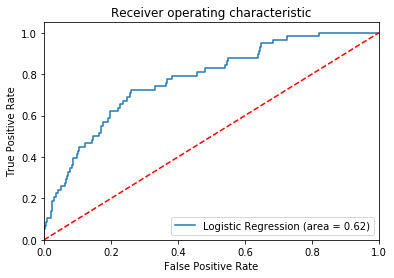

In [4971]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [4972]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[406 335]
 [ 12  46]]


In [4973]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.55      0.70       741
           1       0.12      0.79      0.21        58

    accuracy                           0.57       799
   macro avg       0.55      0.67      0.46       799
weighted avg       0.91      0.57      0.66       799



In [4974]:
a=np.array((np.array(y_pred) > 0) ,dtype=bool)
b=np.array((y_test > 0) ,dtype=bool)
defaults_captured = 0
defaults_missed = 0

defaults_real = [i for i, x in enumerate(b) if x]
defaults_pred = [i for i, x in enumerate(a) if x]
undefaults_real = [i for i, x in enumerate(b) if (not(x))]
undefaults_pred = [i for i, x in enumerate(a) if (not(x))]

# Results we want to optimize

In [4975]:
true_positives = 0
true_negatives = 0

false_positives = 0
false_negatives = 0

for elem in defaults_real:
    if elem in defaults_pred:
        true_positives += 1
    else:
        false_negatives += 1        
        
for elem in undefaults_real:
    if elem in undefaults_pred:
        true_negatives += 1
    else:
        false_positives += 1
        
precision =  true_positives/(true_positives+false_positives)
recall = true_positives/(true_positives+false_negatives)
f1= 2*(precision*recall)/(precision+recall)

print ("precision ", precision)
print ("recall ", recall)
print("f1 ",f1)
print("total defaults missed by model ", false_negatives)
print("cases not labelled as default ", true_negatives, "out of ", len(undefaults_real))

precision  0.12073490813648294
recall  0.7931034482758621
f1  0.20956719817767652
total defaults missed by model  12
cases not labelled as default  406 out of  741


In [4976]:
len(defaults_pred)

381

In [4977]:
true_positives

46

In [4978]:
X_train.describe()

,month,day,weekofyear,log_dayofyear,education2,maritalstatus2,maritalstatus3,town1,age,dependants x age,age_dependants,education_maritalstatus,education_job,gender_FEMALE,gender_MALE
count,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000,9313.000000
mean,-0.049249,-0.023364,-0.048934,-0.029295,-0.015313,-0.034479,-0.012971,0.019000,-0.055891,-0.024240,0.168559,0.070497,0.066402,0.486846,0.444433
std,0.977761,0.976331,0.977769,0.990546,1.014712,1.024178,0.994361,0.986408,1.001779,0.972664,1.243443,1.008235,1.148875,0.499854,0.496929
min,-1.535843,-1.702609,-1.641930,-4.055661,-2.156678,-2.150713,-1.559183,-2.448714,-1.965619,-0.802221,-1.197151,-2.846999,-2.926820,0.000000,0.000000
25%,-0.980577,-0.912009,-0.937343,-0.473081,-0.929163,-0.766342,-0.861888,-0.874871,-0.710365,-0.802221,-0.450683,-0.403381,-0.164915,0.000000,0.000000
50%,-0.147677,-0.008467,-0.040597,0.290602,0.298352,0.618029,0.532702,0.698971,-0.082737,-0.315742,-0.053049,-0.364974,-0.134856,0.000000,0.000000
75%,0.962855,0.782132,0.856150,0.734356,0.298352,0.618029,0.532702,0.698971,0.634551,0.448724,0.452875,1.001773,0.064570,1.000000,1.000000
max,1.518122,1.685674,1.624790,0.998662,1.525867,0.618029,1.229997,0.698971,6.103876,4.271056,14.851899,2.431414,13.889064,1.000000,1.000000
